In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [2]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [4]:
# 1. Generate summary statistics
print("=== Basic Statistics ===")
print(df.describe(include='all'))


=== Basic Statistics ===
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count 

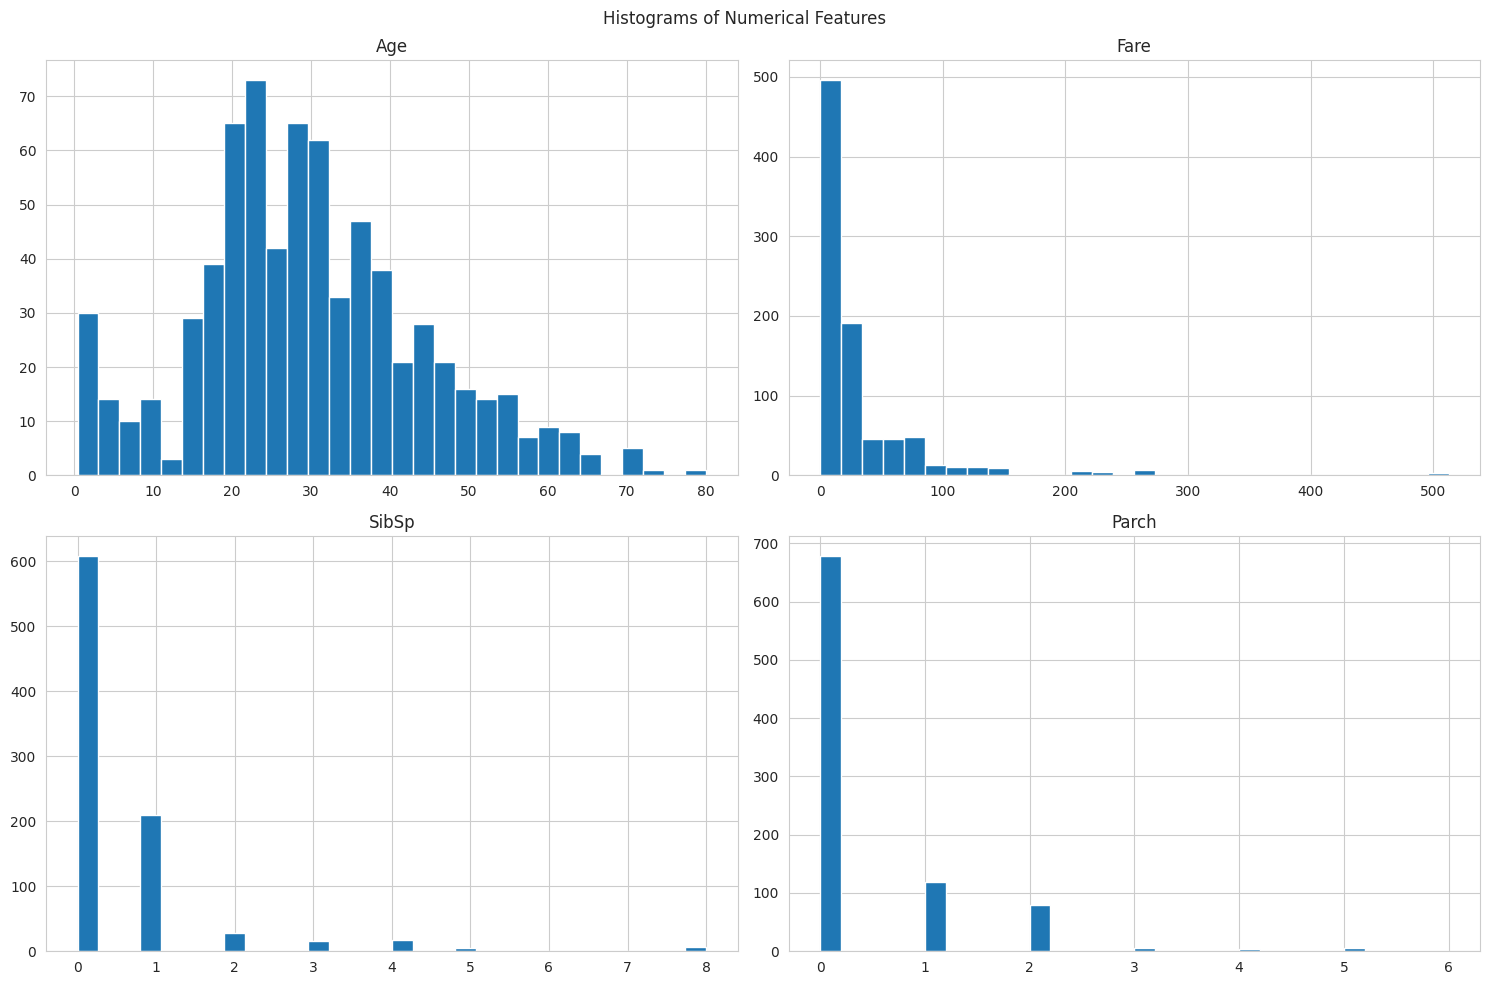

In [5]:
# 2. Data Visualization

# 2.1 Histograms for numerical features
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

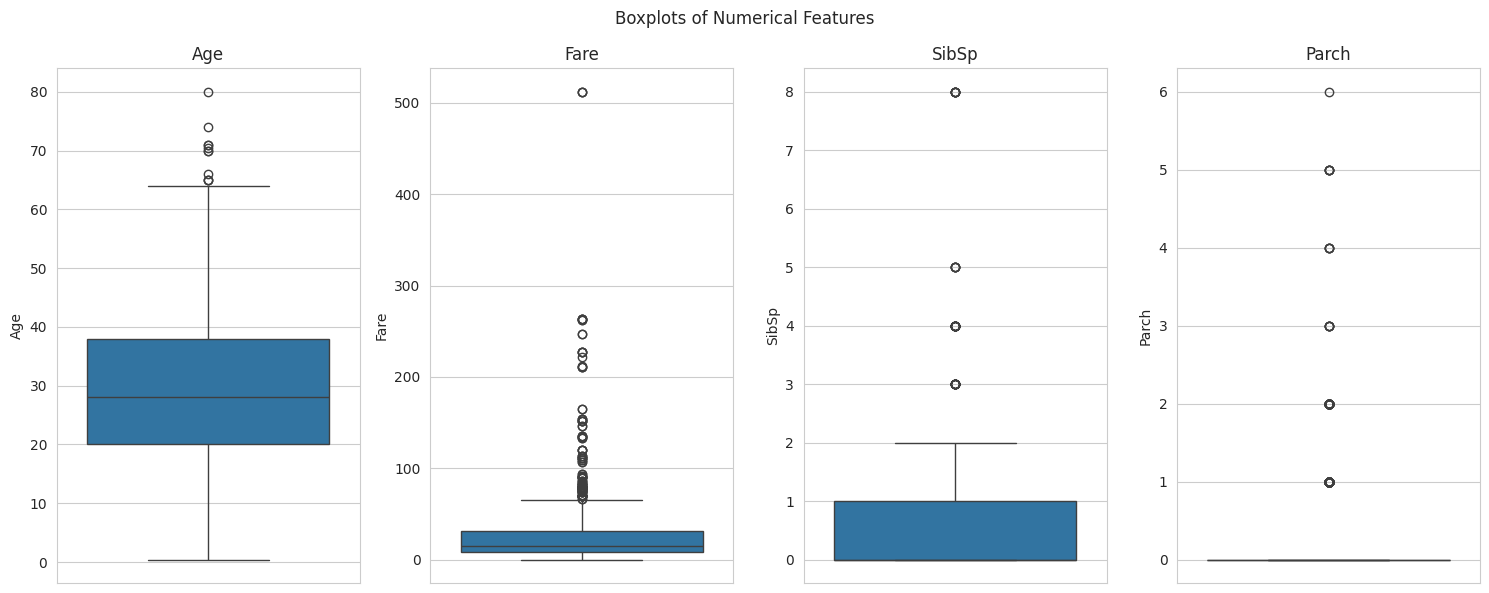

In [6]:
# 2.2 Boxplots for numerical features
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.suptitle('Boxplots of Numerical Features')
plt.tight_layout()
plt.show()

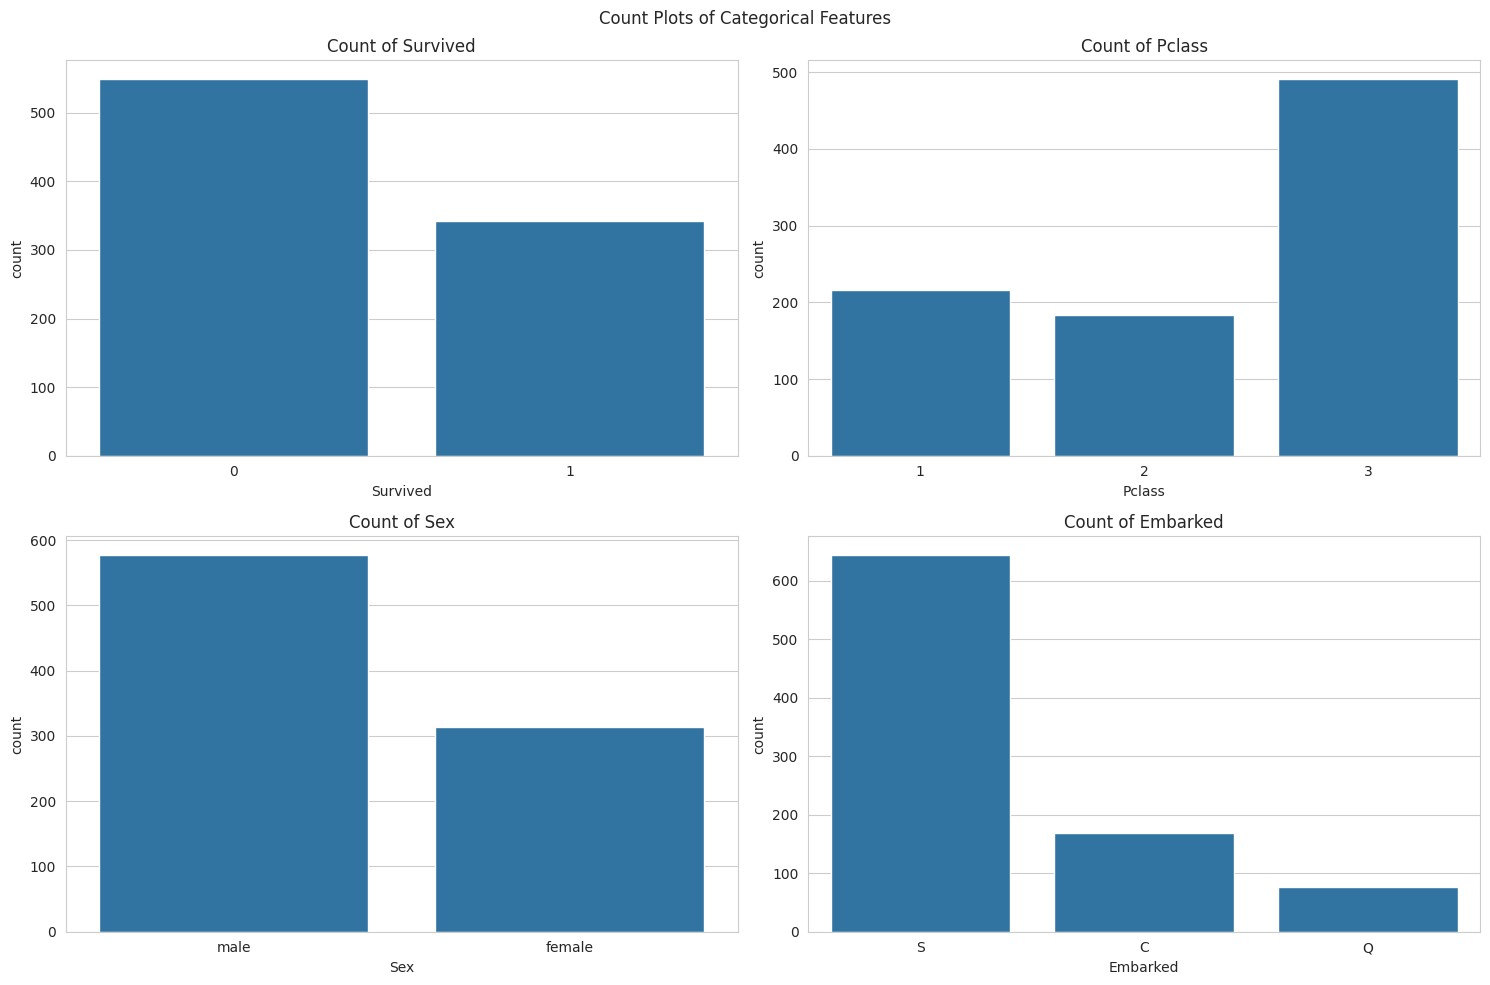

In [7]:
# 2.3 Count plots for categorical features
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
plt.suptitle('Count Plots of Categorical Features')
plt.tight_layout()
plt.show()

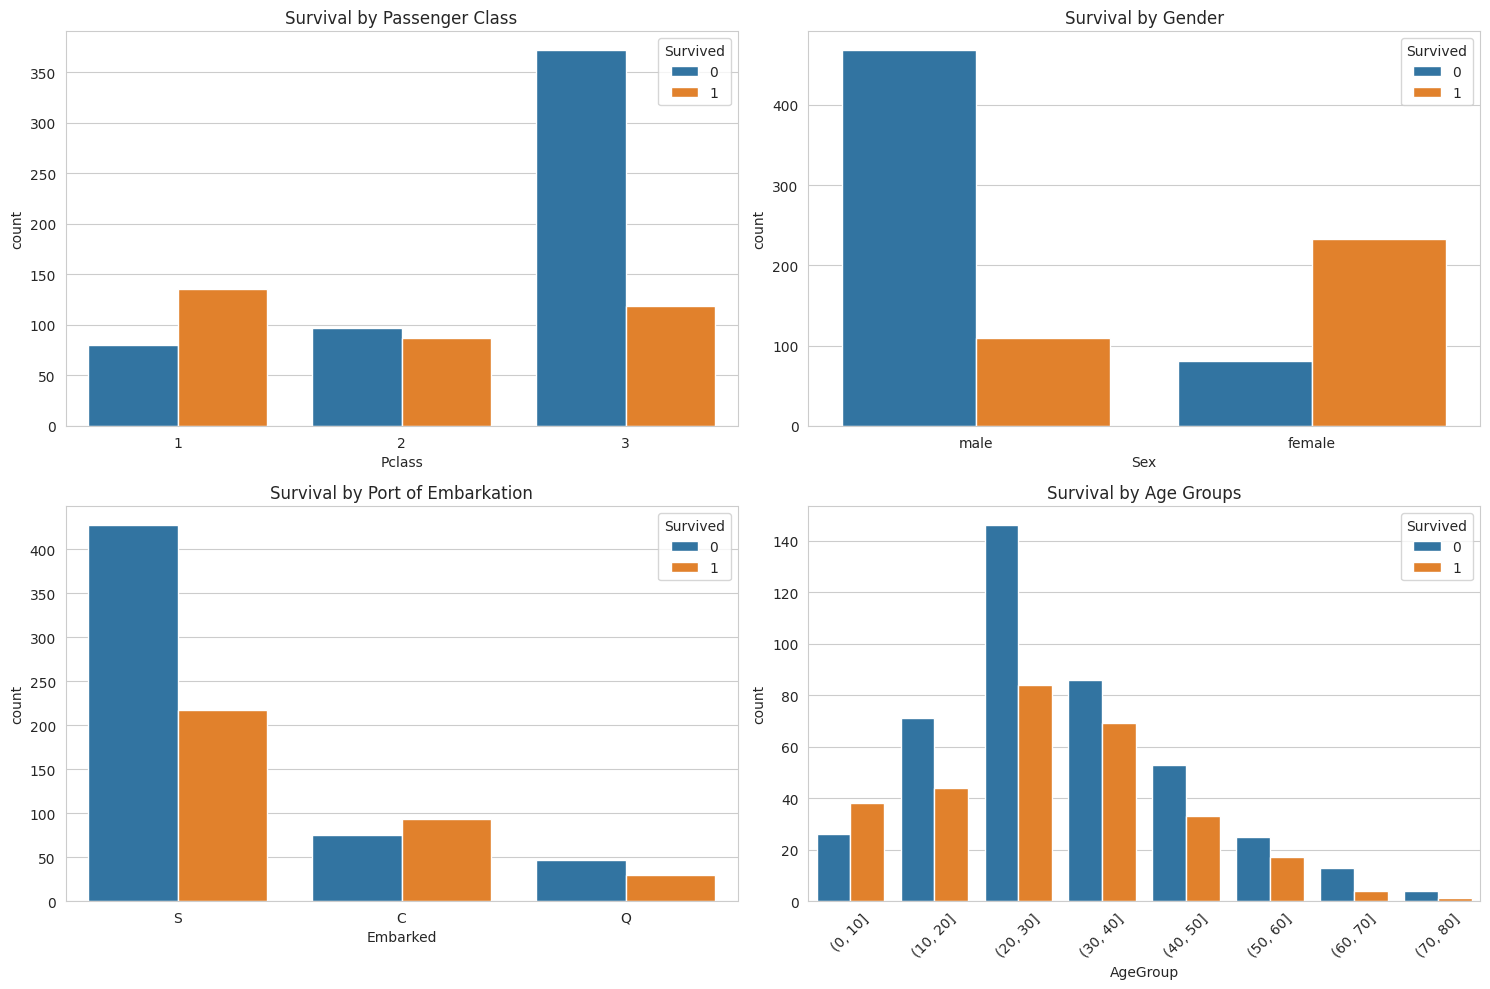

In [10]:
# 2.4 Survival analysis by different features
plt.figure(figsize=(15, 10))
# Survival by Pclass
plt.subplot(2, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
# Survival by Sex
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')

# Survival by Embarked
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Port of Embarkation')

# Survival by Age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)
plt.subplot(2, 2, 4)
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.xticks(rotation=45)
plt.title('Survival by Age Groups')

plt.tight_layout()
plt.show()

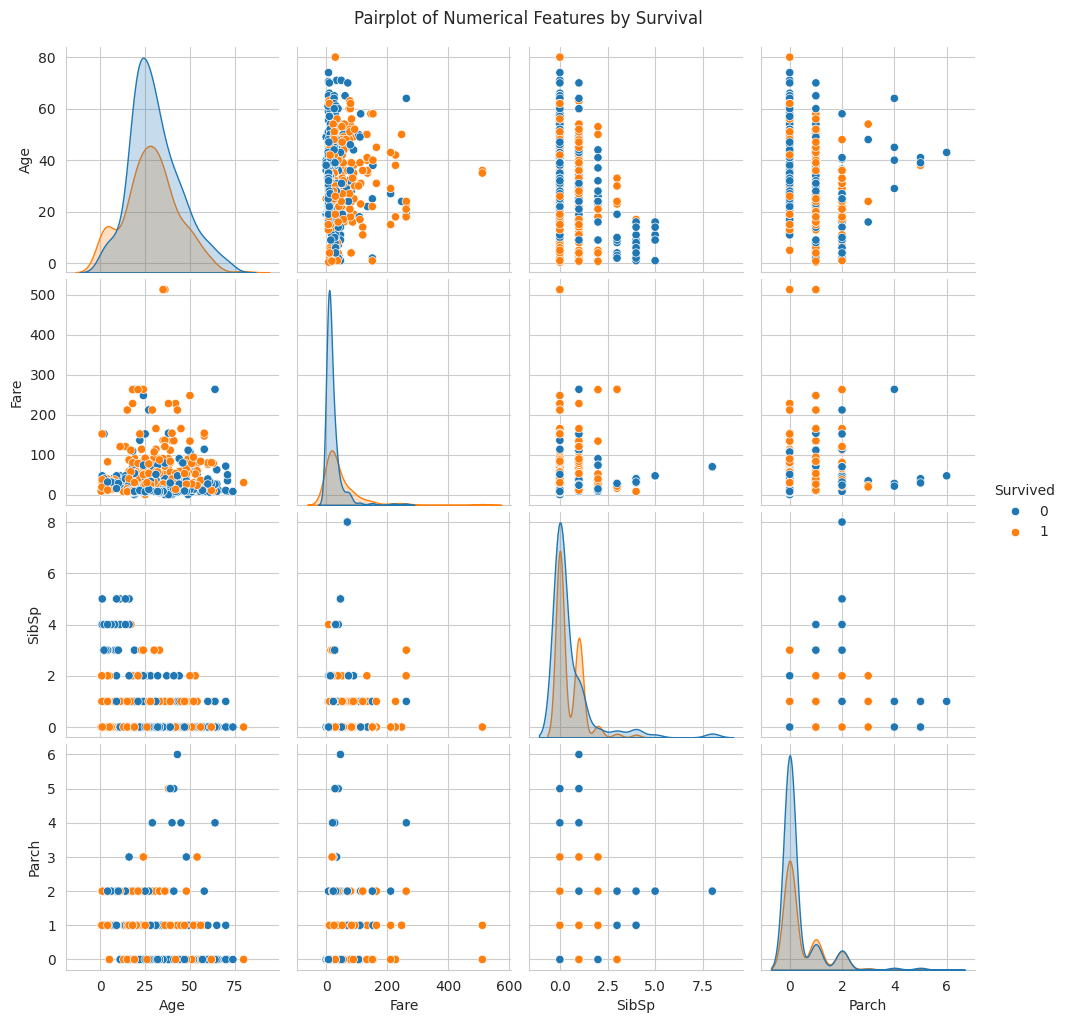

In [11]:
# 3. Feature Relationships

# 3.1 Pairplot of numerical features
sns.pairplot(df[numerical_cols + ['Survived']], hue='Survived')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()


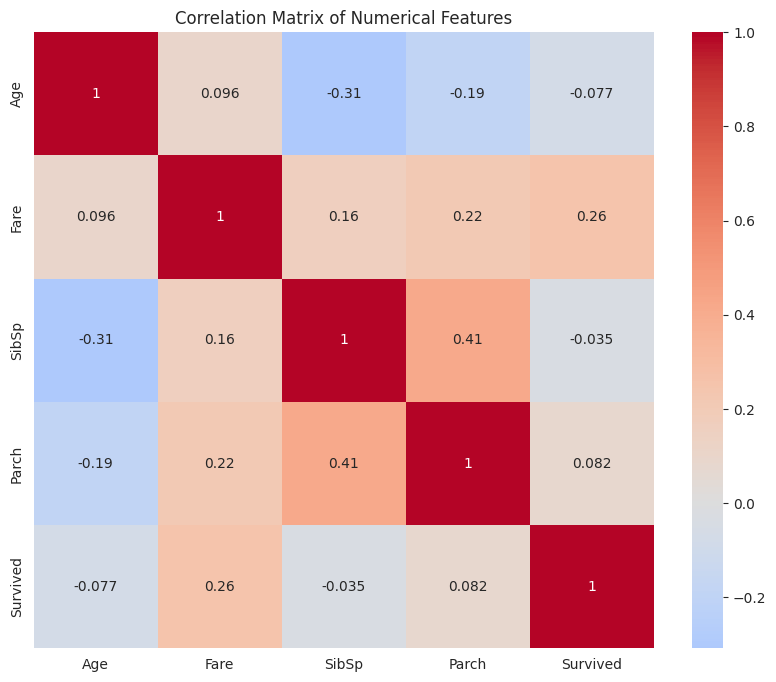

In [12]:
# 3.2 Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols + ['Survived']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# 4. Advanced Visualizations with Plotly

# 4.1 Interactive scatter plot of Age vs Fare colored by Survival
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 hover_data=['Pclass', 'Sex', 'Embarked'],
                 title='Age vs Fare Colored by Survival')
fig.show()

In [14]:
# 4.2 Interactive boxplot of Age distribution by Pclass and Survival
fig = px.box(df, x='Pclass', y='Age', color='Survived',
             title='Age Distribution by Passenger Class and Survival')
fig.show()

In [15]:
# 5. Skewness and Kurtosis analysis
print("\n=== Skewness and Kurtosis ===")
for col in numerical_cols:
    print(f"{col}:")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")
    print("------------------")


=== Skewness and Kurtosis ===
Age:
Skewness: 0.39
Kurtosis: 0.18
------------------
Fare:
Skewness: 4.79
Kurtosis: 33.40
------------------
SibSp:
Skewness: 3.70
Kurtosis: 17.88
------------------
Parch:
Skewness: 2.75
Kurtosis: 9.78
------------------


In [16]:

# 6. Multivariate Analysis

# 6.1 Cross-tabulation of Pclass and Survival
print("\n=== Survival Rate by Passenger Class ===")
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'))


=== Survival Rate by Passenger Class ===
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [17]:
# 6.2 Average Fare by Pclass and Survival
print("\n=== Average Fare by Pclass and Survival ===")
print(df.groupby(['Pclass', 'Survived'])['Fare'].mean().unstack())


=== Average Fare by Pclass and Survival ===
Survived          0          1
Pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887
